In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ads_dimension = pd.read_excel("Dataset.xlsx",sheet_name='ads dimension (dim table)',header=1)
mod_dim = pd.read_excel("Dataset.xlsx",sheet_name='moderator dimension (dim table)',header=0)

#test


### Check Data of Ads Dimension


In [55]:
print(ads_dimension.shape)


(40679, 12)


# Ads Dimension


### Cleaning Punish_Num Column

In [4]:
# to find the distribution of latest_punish_begin_date for blank punish_num rows
condition = ads_dimension['punish_num'].isna()
filtered_df = ads_dimension[condition]
filtered_df.head()

unique_countss = filtered_df['latest_punish_begin_date'].value_counts()
print(unique_countss)

# all latest_punish_begin_date = 2000-01-01 if punish_num is blank, so we replace the blank with a 0
ads_dimension['punish_num'].fillna(0, inplace=True)
unique_counts = ads_dimension['punish_num'].value_counts()
print(unique_counts)

2000-01-01    38286
Name: latest_punish_begin_date, dtype: int64
0.0     38286
1.0      2194
2.0       163
4.0        14
3.0        13
16.0        5
12.0        2
5.0         2
Name: punish_num, dtype: int64


### Removing Duplicate Rows

In [5]:



# deleted all rows that are an exact duplicate(all columns same) of other rows.
len(ads_dimension)

duplicates = ads_dimension.duplicated()
# duplicates = ads_dimension.duplicated().sum()
duplicate_rows = ads_dimension[duplicates]
duplicate_rows


,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
119,20230807,1767389794976760,ID,ID,1.0,2023-05-10,7.7968,10.8649,2023-05-31 06:12:00,1.80,Auction Ads,auction_relation
141,20230807,1770618315063340,CA,USCA,1.0,2023-06-29,55.3400,51.0029,2023-07-05 22:41:00,1.78,Auction Ads,auction_relation
147,20230807,1770774645761070,US,USCA,1.0,2023-06-29,0.3800,51.0029,2023-07-07 16:04:00,1.78,Auction Ads,auction_relation
174,20230807,1770837186637870,ID,ID,1.0,2023-05-16,12.8547,8.2306,2023-07-08 07:35:00,1.80,Auction Ads,auction_relation
178,20230807,1771829420441650,MY,MY,1.0,2023-08-03,25.1724,18.4393,2023-07-19 06:29:00,2.31,Auction Ads,auction_relation
...,...,...,...,...,...,...,...,...,...,...,...,...
40324,20230807,1773576487869440,TR,NaN,0.0,2000-01-01,NaN,0.1207,NaT,0.54,Non-Auction Ads,Promote
40377,20230807,1773566740854850,TR,NaN,0.0,2000-01-01,NaN,0.1032,NaT,0.54,Non-Auction Ads,Promote
40624,20230807,1773596777307170,HU,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40626,20230807,1773601756737540,PL,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


##### We have realised that there are quite a significant number of rows which are duplicated (all columns have the same data), and thus we proceed to remove these rows. 


In [78]:
ads_dimension_no_duplicates = ads_dimension.drop_duplicates()
print(ads_dimension_no_duplicates)
len(ads_dimension_no_duplicates)

# ads_dimension_no_duplicates.to_excel('no_dups_df.xlsx', index=False)


# rename 
ads_dim2 = ads_dimension_no_duplicates


         p_date             ad_id delivery_country queue_market  punish_num  \
0      20230807  1747578422390810               US         USCA         1.0   
1      20230807  1758543228094480               SA         MENA         1.0   
2      20230807  1738303151826990               AU           AU         2.0   
3      20230807  1738303920938010               NZ           NZ         2.0   
4      20230807  1738304016410620               NZ           NZ         2.0   
...         ...               ...              ...          ...         ...   
40673  20230807  1773517805189120               TR          NaN         NaN   
40674  20230807  1773472206047230               VN          NaN         NaN   
40675  20230807  1773607712030720               BR          NaN         NaN   
40676  20230807  1773589699308540               BE          NaN         NaN   
40678  20230807  1773608138524670               BR          NaN         NaN   

      latest_punish_begin_date  ad_revenue  avg_ad_

### Check for Null/Missing Values in Columns 

In [7]:
ads_dim2.head()
# finding the number of null/blank values for all columns in ads_dimension
for col in ads_dim2.columns:
    if ads_dim2[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dim2[col].isna().sum()}')
    else:
        continue


 "queue_market" : 20959
 "ad_revenue" : 10495
 "start_time" : 6600


### Removing Queue Market Column


In [8]:
# Drop queue_market col as delivery_country is more specific than queue_market
ads_dim2 = ads_dim2.drop('queue_market', axis=1)
ads_dim2.head()

,p_date,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [75]:
# Drop redundant cols
ads_dim2 = ads_dim2.drop('p_date', axis=1)

ads_dim2.head()

,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,-157.119926,US,1.0,2023-07-24,274.167808,663.066435,2022-10-24 14:36:00,0.338710,Auction Ads,auction_relation
1,-90.740346,SA,1.0,2023-06-14,105.380370,146.819704,2023-02-22 15:50:00,0.250000,RIE,Ad Group Recall (Merged)
2,-213.271268,AU,2.0,2023-07-24,-0.222194,0.390905,2022-07-14 05:00:00,0.387097,Auction Ads,auction_relation
3,-213.266612,NZ,2.0,2023-07-24,NaN,0.390905,2022-07-14 05:16:00,0.177419,Auction Ads,auction_relation
4,-213.266034,NZ,2.0,2023-07-24,-0.233452,0.390905,2022-07-14 05:17:00,0.177419,Auction Ads,auction_relation


In [76]:
for col in ads_dimension_no_duplicates.columns:
    if ads_dimension_no_duplicates[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dimension_no_duplicates[col].isna().sum()}')
    else:
        continue

null_rows = ads_dimension_no_duplicates[ads_dimension_no_duplicates[['start_time', 'ad_revenue']].isnull().all(axis=1)]
len(null_rows)

 "queue_market" : 20959
 "ad_revenue" : 10495
 "start_time" : 6600


6600

## Data Exploration

In [79]:
ads_dim2.describe()

,p_date,ad_id,punish_num,ad_revenue,avg_ad_revenue,baseline_st
count,39564.0,3.956400e+04,2328.000000,29069.000000,39564.000000,39564.000000
mean,20230807.0,1.772993e+15,1.142182,73.611591,23.232728,1.197242
std,0.0,2.546392e+12,0.851687,493.263304,188.340563,0.660816
min,20230807.0,1.697828e+15,1.000000,0.000000,0.000000,0.540000
25%,20230807.0,1.773399e+15,1.000000,1.372400,0.821900,0.540000
50%,20230807.0,1.773532e+15,1.000000,5.890000,2.539500,1.360000
75%,20230807.0,1.773564e+15,1.000000,20.070000,8.050000,1.780000
max,20230807.0,1.773617e+15,16.000000,27100.620000,17144.498600,7.590000


#### For the different columns, we can see that the variables have different value ranges and magnitiudes. The max values have a great disparity and the std are also different for the different variables. Let us first look at the distribution of the variables 

### Numerical Variables 

#### Histogram

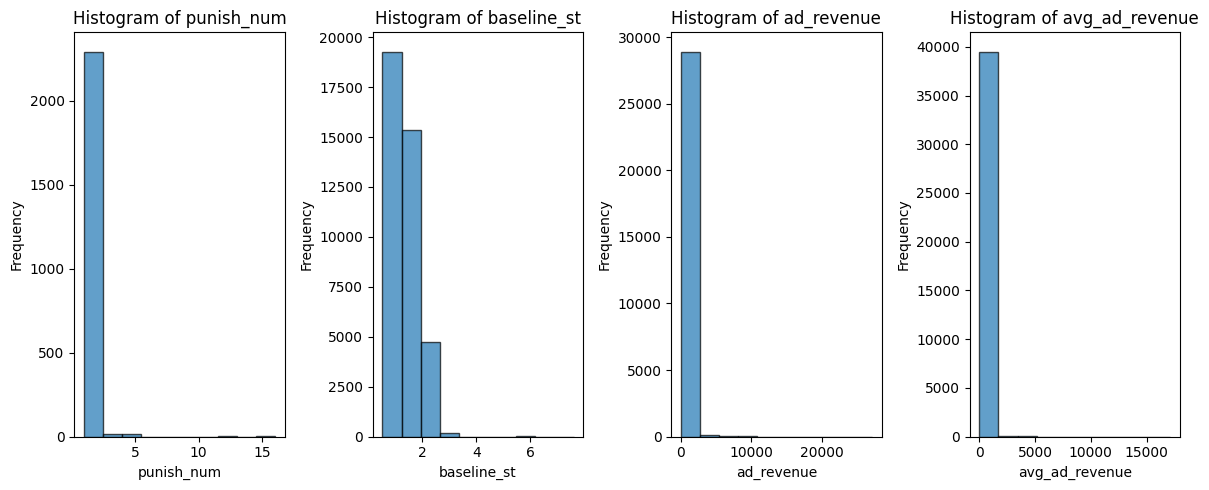

In [86]:
plt.figure(figsize=(12, 5))
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim2[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### From the above histograms, we can see that the variables are not normally distributed. The data seems extremely skewed as well. 

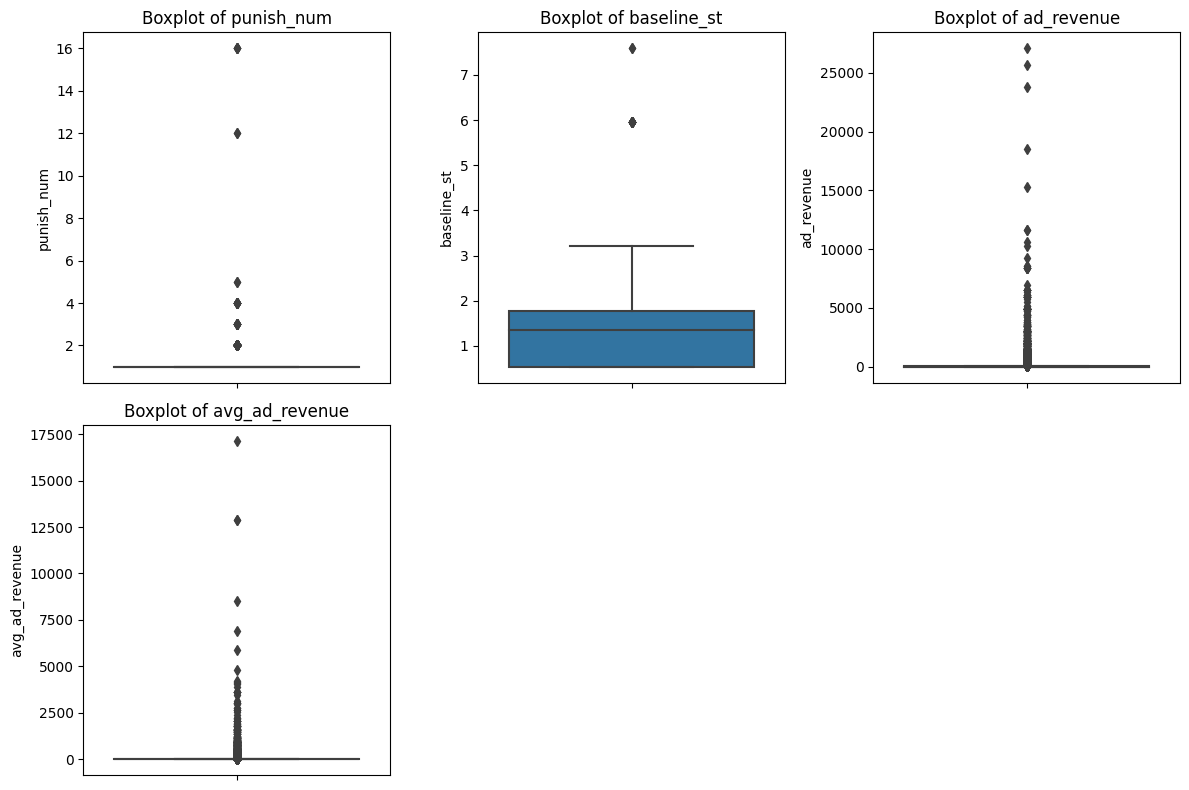

In [85]:
# Select numerical columns for outlier analysis
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ads_dim2, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()




In [82]:
ads_dim2["punish_num"].value_counts()

1.0     2134
2.0      158
4.0       14
3.0       13
16.0       5
12.0       2
5.0        2
Name: punish_num, dtype: int64

### Find the number of outliers per numerical column

In [83]:


punish_num_outliers = ads_dim2[ads_dim2['punish_num'] > 10]

print("The number of outliers for punish_num = ", len(punish_num_outliers))
print(punish_num_outliers["punish_num"])



baseline_st_outliers = ads_dim2[ads_dim2['baseline_st'] > 5]

print("The number of outliers for baseline_st = ", len(baseline_st_outliers))
print(punish_num_outliers["baseline_st"])


The number of outliers for punish_num =  7
10     16.0
11     16.0
12     16.0
15     16.0
16     16.0
508    12.0
531    12.0
Name: punish_num, dtype: float64
The number of outliers for baseline_st =  23
10     3.21
11     3.21
12     3.21
15     3.21
16     3.21
508    2.14
531    2.14
Name: baseline_st, dtype: float64


In [84]:
ad_rev_outliers = ads_dim2[ads_dim2['ad_revenue'] > 20000]

print("The number of outliers for ad_rev = ", len(ad_rev_outliers))
print(punish_num_outliers["ad_revenue"])

avg_ad_revenue_outliers = ads_dim2[ads_dim2['avg_ad_revenue'] > 10000]

print("The number of outliers for avg_ad_revenue = ", len(avg_ad_revenue_outliers))
print(punish_num_outliers["avg_ad_revenue"])

The number of outliers for ad_rev =  3
10     517.5400
11     530.7100
12       0.0000
15     547.4000
16     528.1400
508         NaN
531      1.1753
Name: ad_revenue, dtype: float64
The number of outliers for avg_ad_revenue =  3
10     23.7129
11     23.7129
12     23.7129
15     23.7129
16     23.7129
508     2.4270
531     2.4270
Name: avg_ad_revenue, dtype: float64


#### From the above outlier analysis, we can see that these variables all have outliers. As these variables have different max and std values, scaling is required. Since outliers are present and that these variables are in a non -normal distribution suggests that robust scaling should be conducted on the data. We use robust scaling as we want to bring the data into a consistent scale while minimizing the impact of extreme values. This technique would also be helpful for machine learning models that would be utilised later on. 


## Robust Scaling

In [72]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 


In [90]:
variables = ["ad_id",	"punish_num",	"ad_revenue", "avg_ad_revenue",	"baseline_st"]

## create new dataframe 
ads_dim_scaled = ads_dim2.copy()
subset = ads_dim2[variables]


# fit and transform variables 
scaled_data = scaler.fit_transform(subset)
ads_dim_scaled[variables] = scaled_data

ads_dim_scaled.describe()


,p_date,ad_id,punish_num,ad_revenue,avg_ad_revenue,baseline_st
count,39564.0,39564.000000,2328.000000,29069.000000,39564.000000,39564.000000
mean,20230807.0,-3.263549,0.142182,3.621940,2.862886,-0.131257
std,0.0,15.415543,0.851687,26.381103,26.056718,0.532916
min,20230807.0,-458.304722,0.000000,-0.315014,-0.351337,-0.661290
25%,20230807.0,-0.803917,0.000000,-0.241614,-0.237628,-0.661290
50%,20230807.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20230807.0,0.196083,0.000000,0.758386,0.762372,0.338710
max,20230807.0,0.511511,15.000000,1449.102024,2371.571935,5.024194


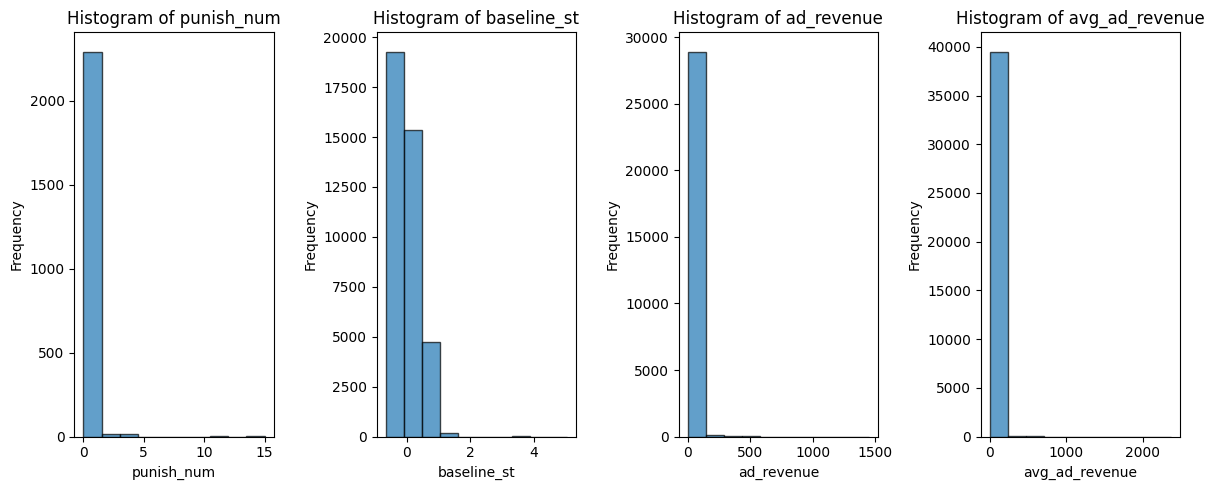

In [91]:
plt.figure(figsize=(12, 5))
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim_scaled[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


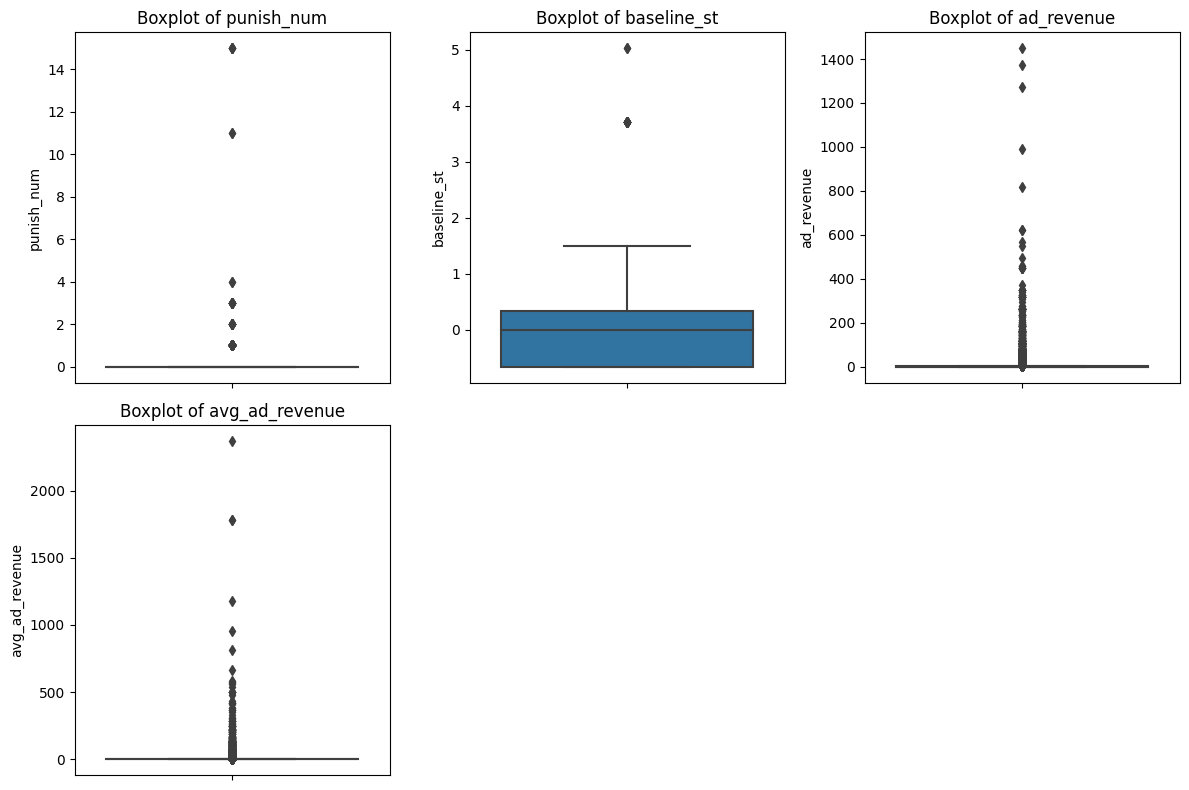

In [92]:
# Select numerical columns for outlier analysis
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ads_dim_scaled, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()




### Categorical Variables 

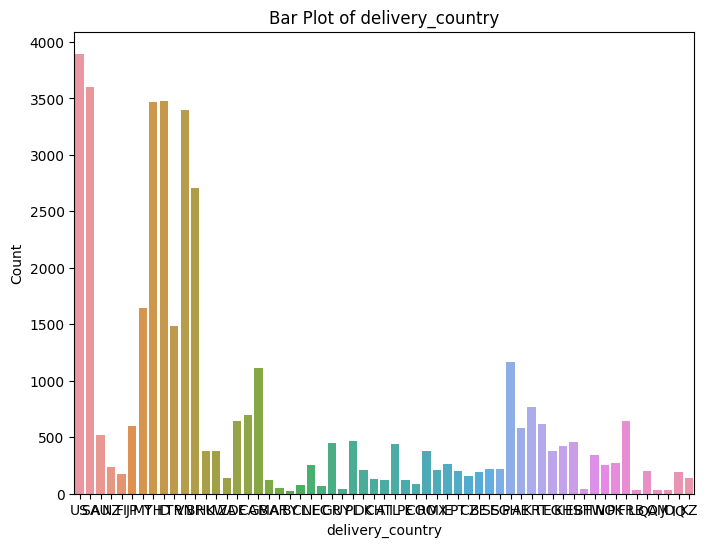

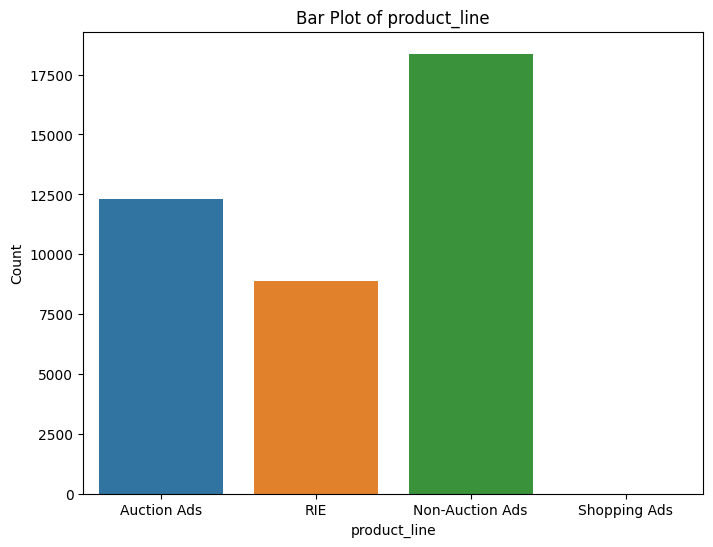

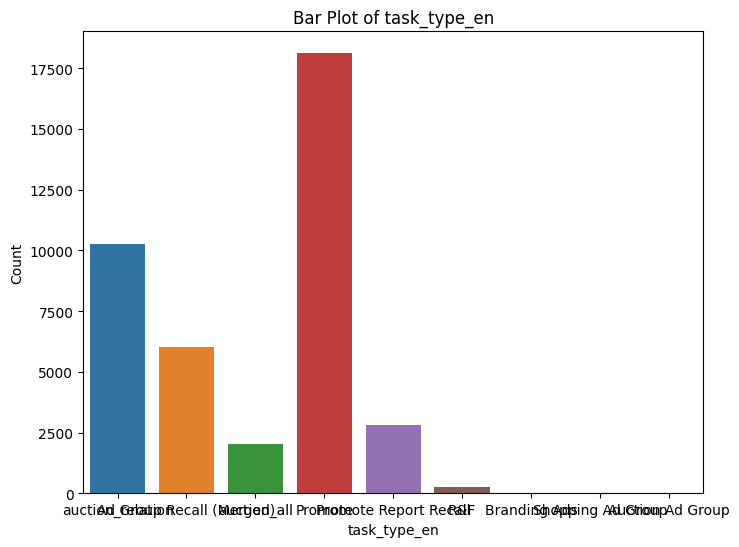

In [48]:
cat_cols = [ 'delivery_country','product_line' ,'task_type_en']

# Create a bar plot for each categorical column
for column in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=ads_dim2, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [14]:
# ad revenue that is null 
blank_ad_revenue_condition = ads_dimension_no_duplicates['ad_revenue'].isna()
filtered_df_ads = ads_dimension_no_duplicates[blank_ad_revenue_condition]
filtered_df_ads


,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
3,20230807,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.3650,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
262,20230807,1772998101648410,VN,VN,3.0,2023-08-02,NaN,2.9423,2023-08-01 03:56:00,2.13,RIE,Ad Group Recall (Merged)
288,20230807,1773112965960700,US,USCA,2.0,2023-08-07,NaN,9.9047,2023-08-02 10:28:00,1.78,Auction Ads,auction_relation
411,20230807,1773231382949920,BR,BR,1.0,2023-08-07,NaN,0.4337,2023-08-04 10:00:00,1.70,RIE,Ad Group Recall (Merged)
426,20230807,1773312757473310,FR,FR,1.0,2023-07-27,NaN,2.7379,2023-08-04 16:23:00,1.97,Auction Ads,auction_relation
...,...,...,...,...,...,...,...,...,...,...,...,...
40673,20230807,1773517805189120,TR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40674,20230807,1773472206047230,VN,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40675,20230807,1773607712030720,BR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40676,20230807,1773589699308540,BE,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


## Moderator Dimension

In [49]:
print(mod_dim.shape)
# Check for duplicate rows in mod_dim 
mod_duplicates = mod_dim.duplicated().sum()
print(mod_duplicates)

(1414, 6)
0


In [18]:
# find number of null values in each column

for col in mod_dim.columns:
    if mod_dim[col].isna().sum() > 0:
        print(f' "{col}" : {mod_dim[col].isna().sum()}')
    else:
        continue

# accuracy colum contains "-" values
non_numeric_values = mod_dim[pd.to_numeric(mod_dim[" accuracy "], errors='coerce').isna()]
len(non_numeric_values)

print(non_numeric_values)

 "Productivity" : 129
 "Utilisation %" : 129
             moderator                                             market  \
0     1689841547143170  ["SA", "OM", "BH", "QA", "JO", "IQ", "KW", "EG...   
265   1694555598292994                                             ["NL"]   
412   1761892264652818                                             ["DE"]   
510            1005827                                             ["BR"]   
529            2796851                                             ["KZ"]   
892            3778633                                             ["TR"]   
916            5581253                                             ["DK"]   
943            9699751                                             ["ID"]   
1283           1822136                                       ["GB", "IE"]   
1331           3297271                                          ["OTHER"]   
1393  1695027913818113                                             ["IT"]   

      Productivity  Utilisatio

In [50]:
# remove rows that have null values for productivity and utilisation, and "-" values for accuracy
column_name = ' accuracy '
numeric_mask = pd.to_numeric(mod_dim[column_name], errors='coerce').notna()
cleaned_mod_dim = mod_dim[numeric_mask]

print(len(cleaned_mod_dim))

columns_to_check = ['Productivity', 'Utilisation %']

cleaned_mod_dim = cleaned_mod_dim.dropna(subset=columns_to_check, how='all')

print(len(cleaned_mod_dim))


1403
1275


### Exploratory Data Analysis of Moderator Dimension

In [51]:
# Get basic statistics of numeric columns
print(cleaned_mod_dim.describe())

# Check for missing values
print(cleaned_mod_dim.isnull().sum())

# Check data types of columns
print(cleaned_mod_dim.dtypes)

          moderator  Productivity  Utilisation %  handling time
count  1.275000e+03   1275.000000    1275.000000   1.275000e+03
mean   1.084096e+15    368.445545       0.725055   1.068949e+05
std    8.345996e+14    177.840831       0.195460   3.747668e+05
min    1.003316e+06      0.540000       0.000000   7.300000e+01
25%    7.064704e+06    249.239693       0.658732   6.276050e+04
50%    1.695291e+15    344.712500       0.779906   8.586800e+04
75%    1.736353e+15    462.375000       0.849611   1.016235e+05
max    1.774284e+15   1323.355000       1.287250   9.443621e+06
moderator        0
market           0
Productivity     0
Utilisation %    0
handling time    0
 accuracy        0
dtype: int64
moderator          int64
market            object
Productivity     float64
Utilisation %    float64
handling time      int64
 accuracy         object
dtype: object


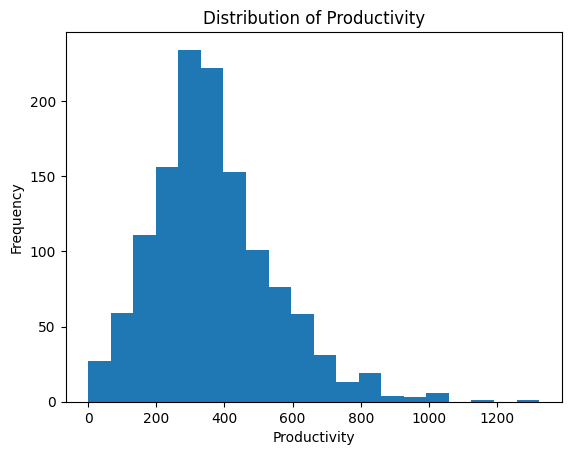

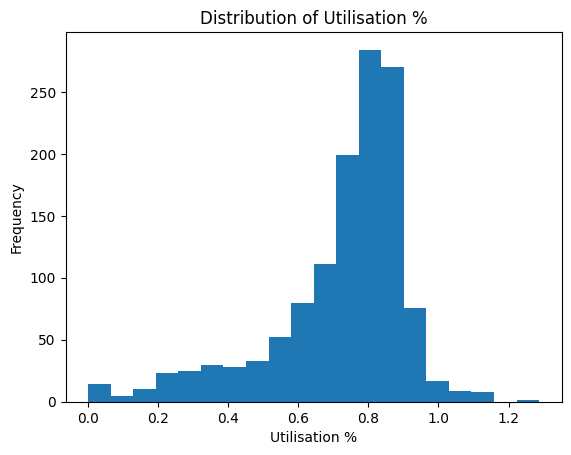

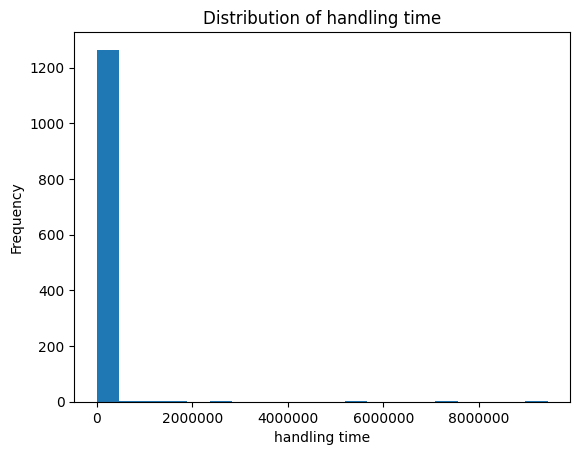

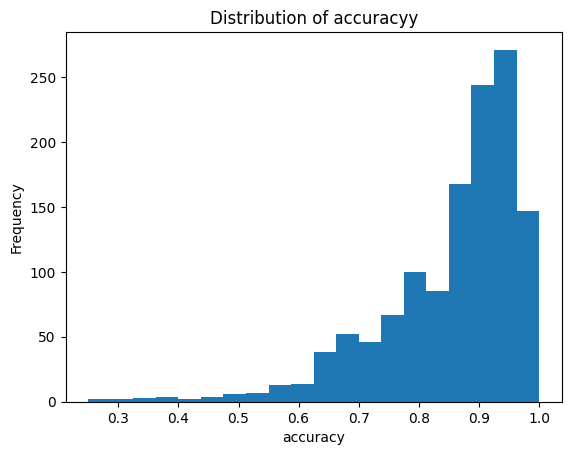

In [52]:

# Histogram of 'Productivity'
plt.hist(cleaned_mod_dim['Productivity'], bins=20)
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Productivity')
plt.show()

# Histogram of 'Utilisation %'
plt.hist(cleaned_mod_dim['Utilisation %'], bins=20)
plt.xlabel('Utilisation %')
plt.ylabel('Frequency')
plt.title('Distribution of Utilisation %')
plt.show()


# Histogram of 'handling time'
plt.hist(cleaned_mod_dim['handling time'], bins=20)
plt.xlabel('handling time')
plt.ylabel('Frequency')
plt.title('Distribution of handling time')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


# Histogram of 'accuracy'
plt.hist(cleaned_mod_dim[' accuracy ' ], bins=20)
plt.xlabel('accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of accuracyy')
plt.show()


/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_9600/2370735937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_mod_dim.corr()


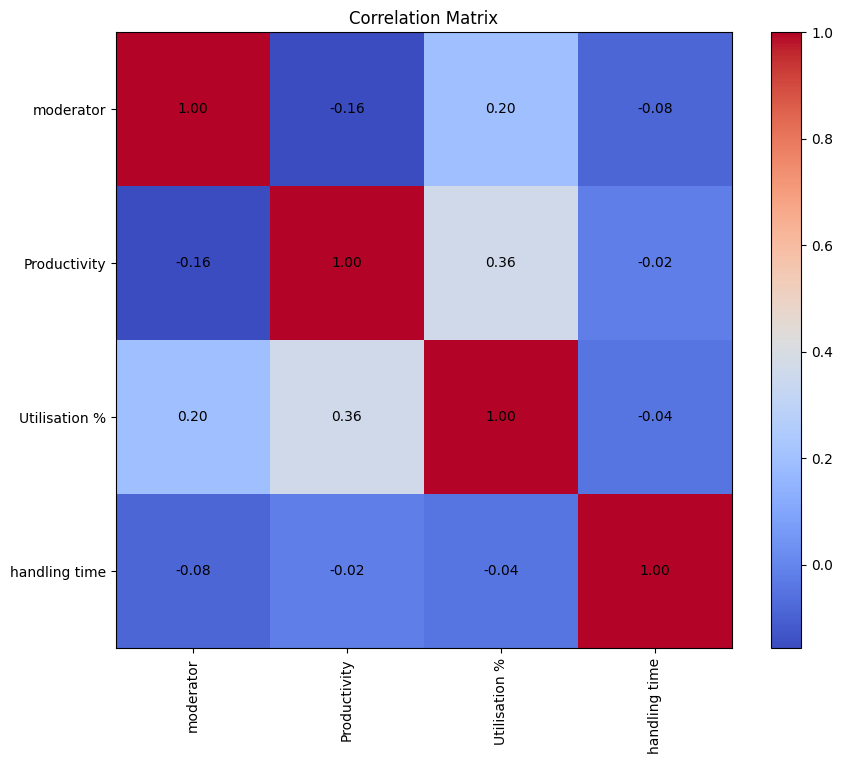

In [53]:
# Compute the correlation matrix
correlation_matrix = cleaned_mod_dim.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using imshow
im = ax.imshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(im)

# Set ticks and labels
tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, correlation_matrix.columns)

# Add text annotations for each correlation coefficient
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"  # Format to two decimal places
        ax.text(j, i, text, ha='center', va='center', color='black', fontsize=10)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()